In [1]:
from pymongo import MongoClient
import urllib.request
from io import BytesIO
from PIL import Image
from gridfs import GridFSBucket

In [2]:
db = MongoClient().python_test
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'python_test')

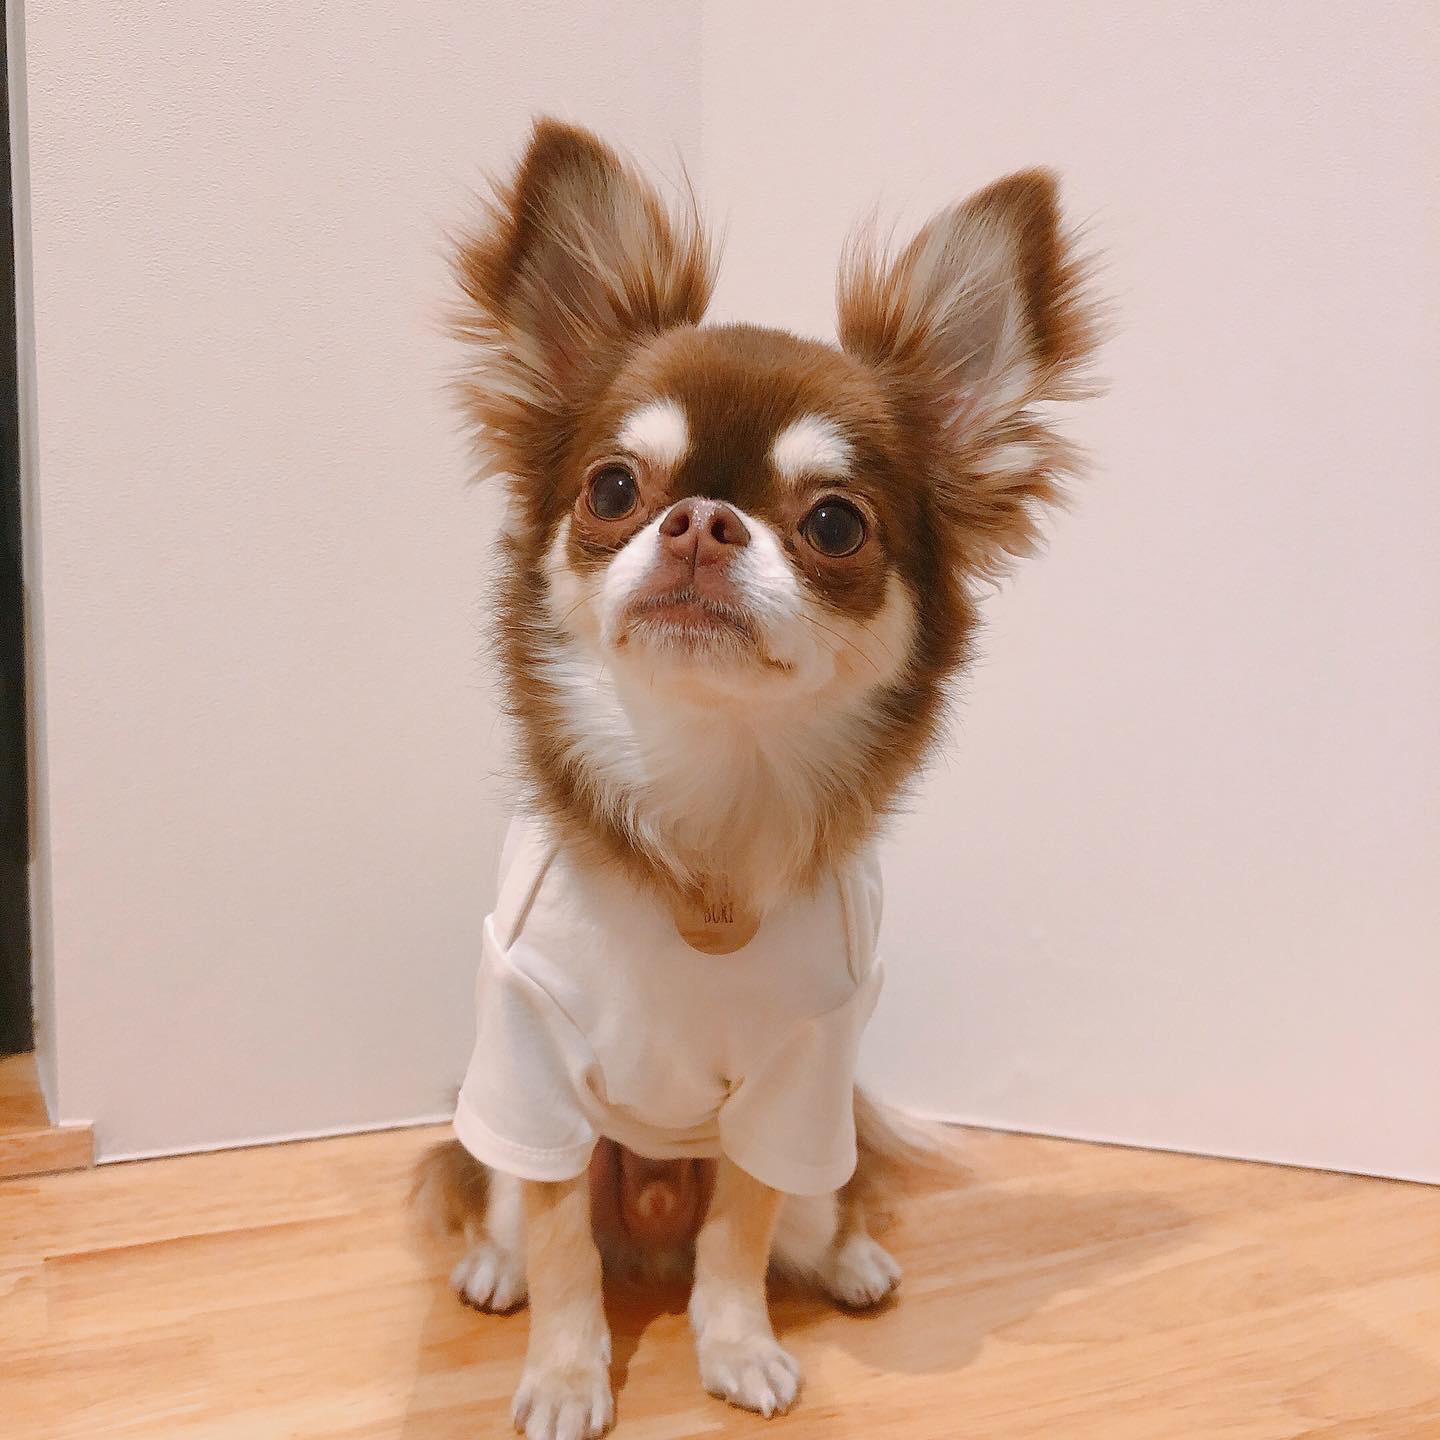

In [3]:
url = "https://cdn.imweb.me/upload/S20190918d038d5b2c1898/5ddbb1406b0dc.jpeg"
data = urllib.request.urlopen(url).read()
# print(data)
Image.open(BytesIO(data))

In [4]:
#MongoDB로 파일을 업로드할 객체 생성
bucket = GridFSBucket(db)
bucket

In [5]:
grid_in = bucket.open_upload_stream('result03.jpg', metadata={'contentType':'image/jpg'})

In [6]:
grid_in

In [7]:
grid_in.write(data)
grid_in.close()

In [9]:
image_list = list(db.fs.files.find())
print(image_list)
print(len(image_list))

[{'_id': ObjectId('63f706753addc465f3342225'), 'filename': 'result03.jpg', 'metadata': {'contentType': 'image/jpg'}, 'chunkSize': 261120, 'length': 264226, 'uploadDate': datetime.datetime(2023, 2, 23, 6, 24, 27, 427000)}, {'_id': ObjectId('63f706b41af904c6082f56d0'), 'filename': 'result03.jpg', 'metadata': {'contentType': 'image/jpg'}, 'chunkSize': 261120, 'length': 264226, 'uploadDate': datetime.datetime(2023, 2, 23, 6, 24, 52, 144000)}]
2


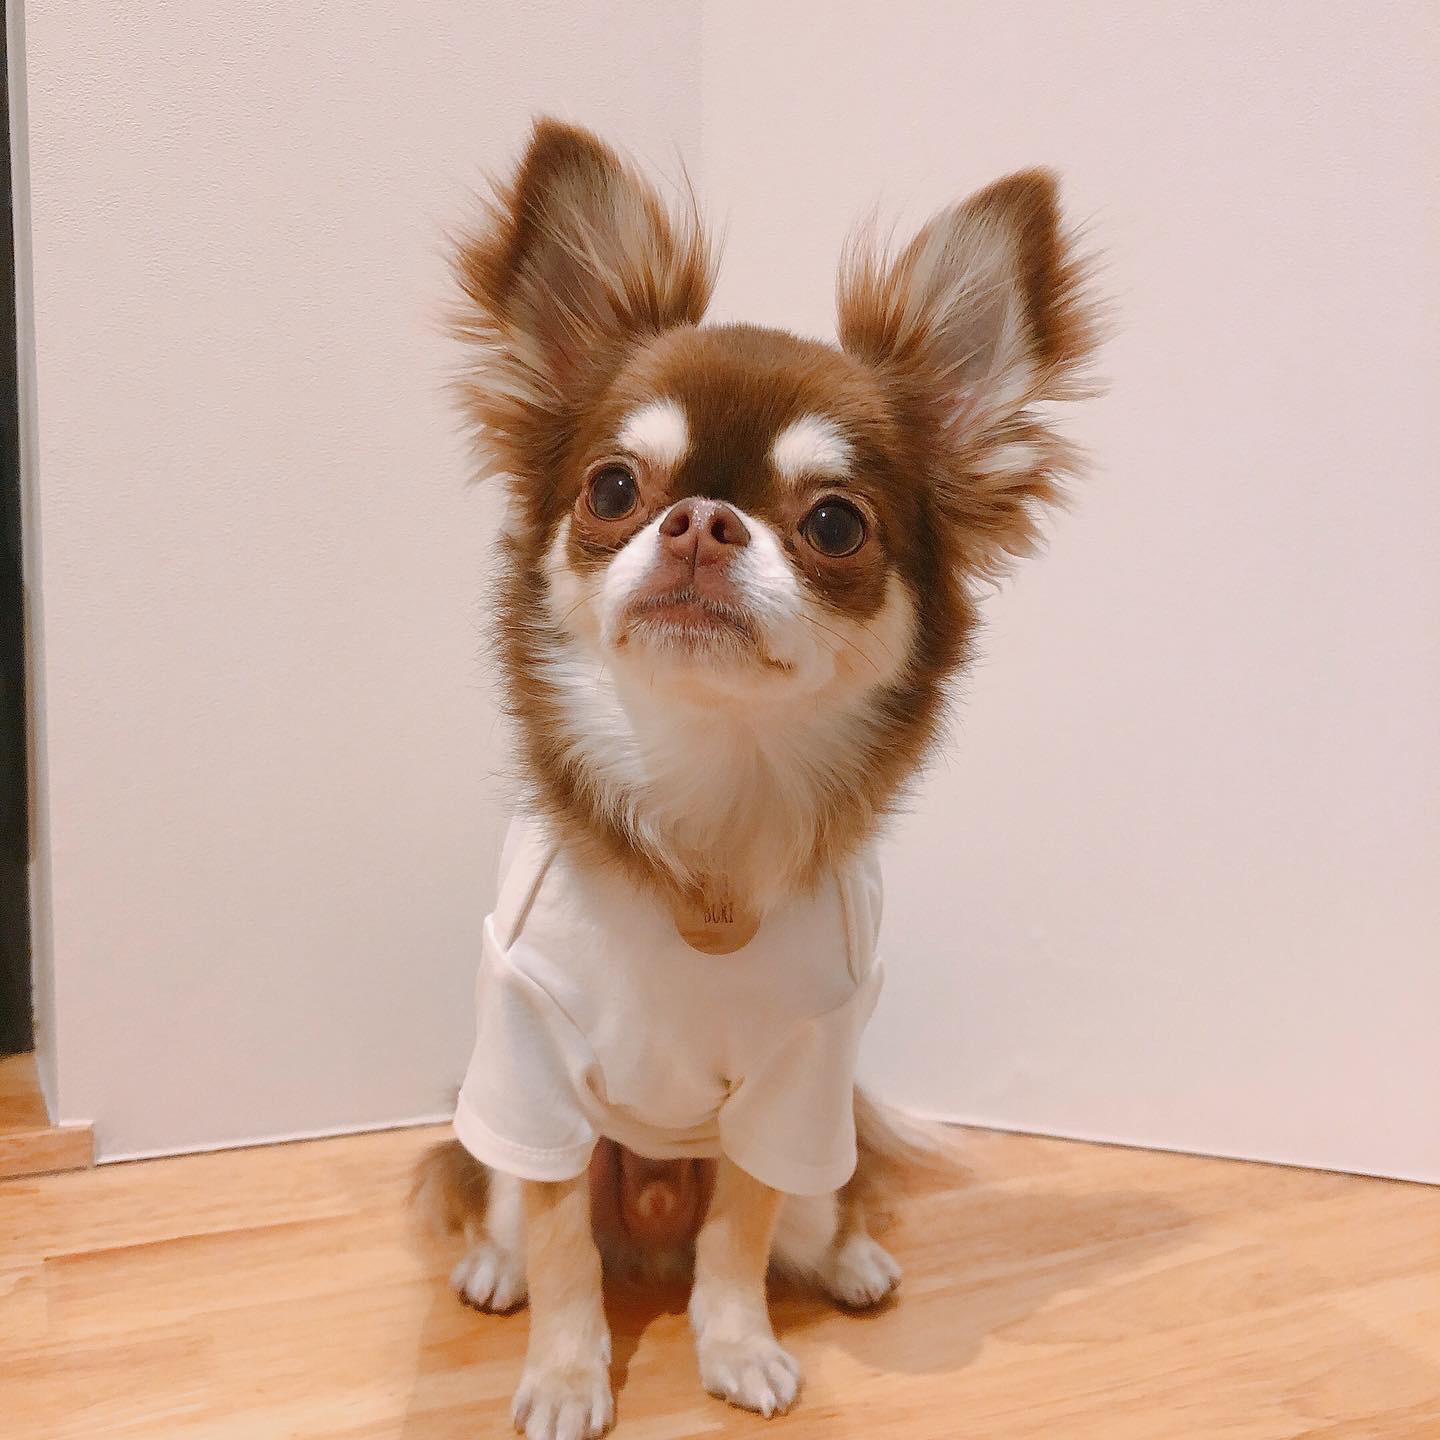

In [12]:
from gridfs import GridFS
fs = GridFS(db)
f = fs.get_last_version(filename='result03.jpg')
# f.read()
dataImage = f.read()
# dataImage

real_image = Image.open(BytesIO(dataImage))
real_image